The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
link=f"/content/drive/My Drive/ext-foodhub_order.csv"

file = pd.read_csv(link)

In [ ]:
file.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Q1. how many rows and columns are present in the data?

In [ ]:
file.shape

(1898, 9)

Ans1. 9 columns and 1898 rows

Q2. What are the datatypes of different columns in the dataset?

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: order_id,customer_id,food_preparation_time,delivery_time are int datatype;  restaurant_name, cuisine_type, day_of_the_week, rating are object datatype and cost_of_the_order is float

Q3. Are there any missing values in the data?

In [ ]:
file.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


Observations:  There is no missing data

Q4. Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
file.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


Observations: Maximum time to prepare food is 35 minutes. On average it takes 27.37 minutes and the minimum time to prepare food is 20 minutes


Q5. how many orders are not rated?

In [ ]:
file['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


Observation: 736 orders are not rated

Q6. Explore all the variables and provide observations on their distributions.

In [ ]:
len(file['restaurant_name'].unique())

178

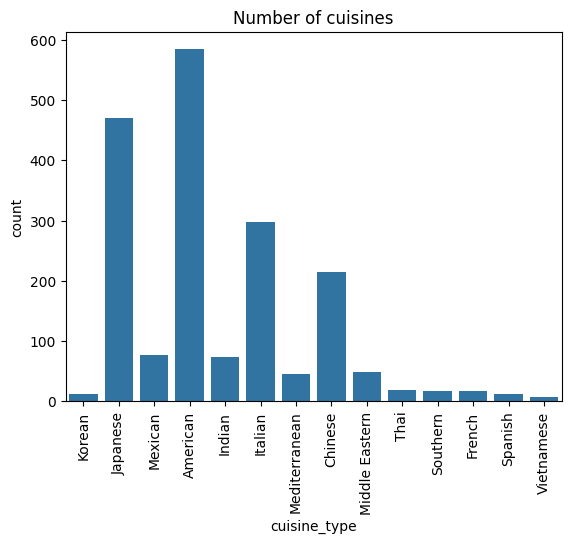

In [ ]:
file['cuisine_type'].value_counts()
plot=sns.countplot(x='cuisine_type', data=file)
plot.tick_params(axis='x', rotation=90)

plt.title('Number of cuisines')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5a4820b410>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5a48209a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5a48209510>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5a48209c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5a9520b190>],
 'means': []}

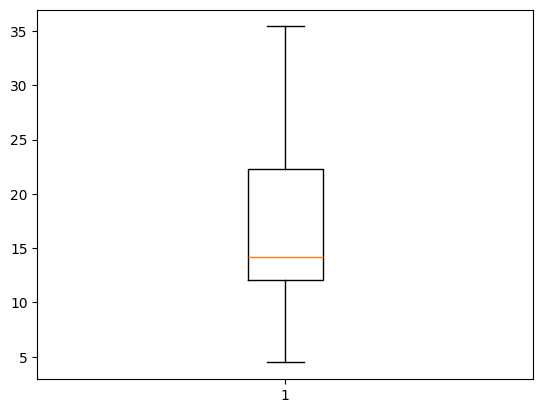

In [ ]:
plt.boxplot(file['cost_of_the_order'])

<Axes: xlabel='day_of_the_week', ylabel='count'>

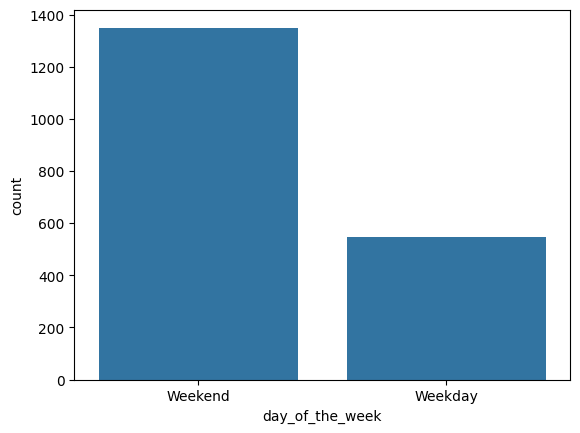

In [ ]:
sns.countplot(x="day_of_the_week",data=file)

<Axes: xlabel='rating', ylabel='count'>

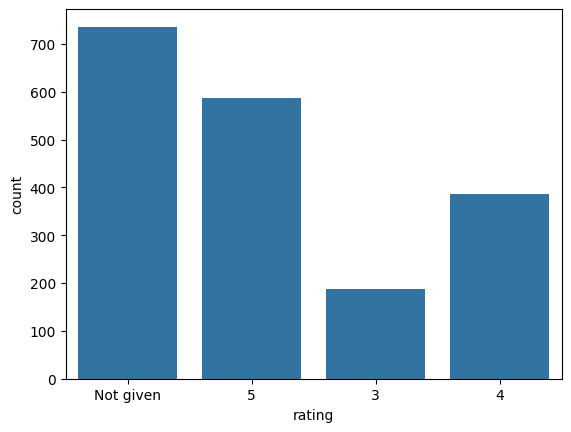

In [ ]:
sns.countplot(x="rating",data=file)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5a42251c90>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5a427fcb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5a42405390>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5a42253050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5a424fc710>],
 'means': []}

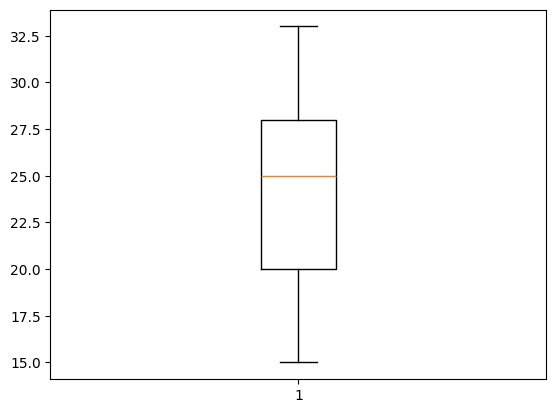

In [ ]:
plt.boxplot(file['delivery_time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a5a4268a510>,
 'caps': [<matplotlib.lines.Line2D at 0x7a5a422d2550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a5a425a55d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a5a422d24d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a5a422d1c10>],
 'means': []}

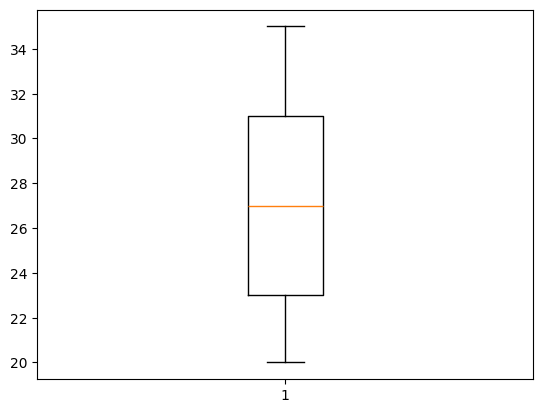

In [ ]:
plt.boxplot(file["food_preparation_time"])

Observations:
- There are 178 unique restaurants
- American cuisine has the highest number of restaurants, lowest being vietnamese
- majority of the prices of food lie between 12 and 22. Minimum being 4 and maximum 35
- majority of orders are placed on weekends
- Most orders are not given any ratings. 5 star ratings are common
- Delivery time does not have many outliers. 25% of the users get their food delivered in 20 minutes, 75% in 27 minutes. The time is standard
- Maximum time to prepare food is 35 minutes. On average it takes 27.37 minutes and the minimum time to prepare food is 20 minutes

Q8. Which is the most popular cuisine on weekends?

In [ ]:
file[file["day_of_the_week"]=="Weekend"]["cuisine_type"].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


Observations: American is the most common cuisine type on weekends

Q9. What percentage of the orders cost more than 20 dollars?

In [ ]:
len(file[file["cost_of_the_order"]>20])/len(file)

0.2924130663856691

29 percent of the orders cost more than 20 dollars

Q10. What is the mean order delivery time?

In [ ]:
file["delivery_time"].mean()

np.float64(24.161749209694417)

24.16 minutes is the mean delivery time

Q11. he company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
file["customer_id"].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


ID - 52832 orders- 13

ID - 47440 orders- 10

ID - 83287 orders- 9

Q12. Perform a multivariate analysis to explore relationships between the important variables in the dataset.

<Axes: >

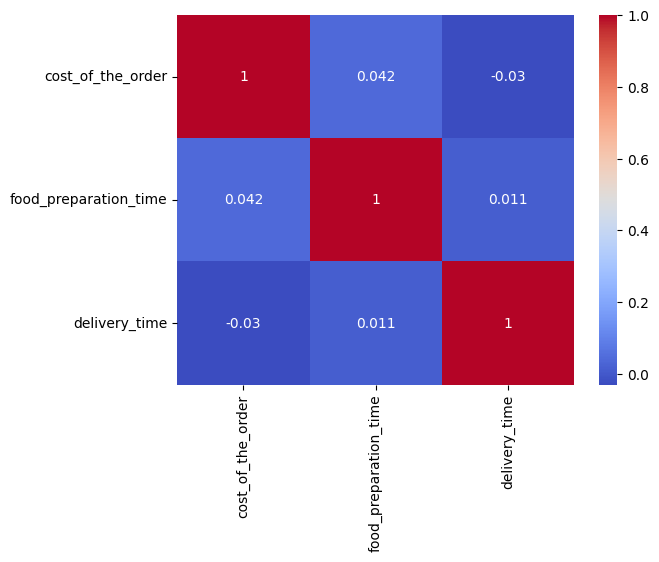

In [ ]:
correlation_matrix = file[['cost_of_the_order','food_preparation_time', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='rating', ylabel='delivery_time'>

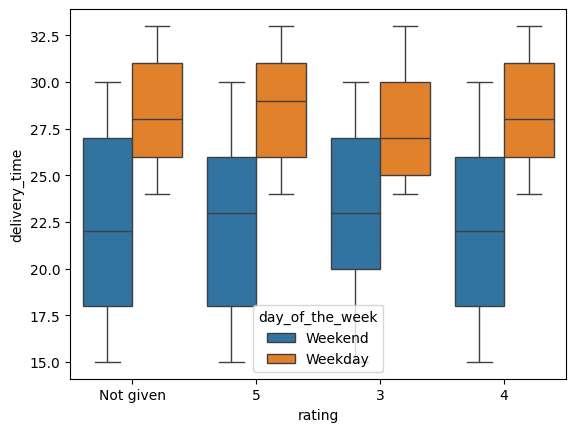

In [ ]:
sns.boxplot(x="rating",y="delivery_time",hue="day_of_the_week",data=file)

<Axes: xlabel='rating', ylabel='delivery_time'>

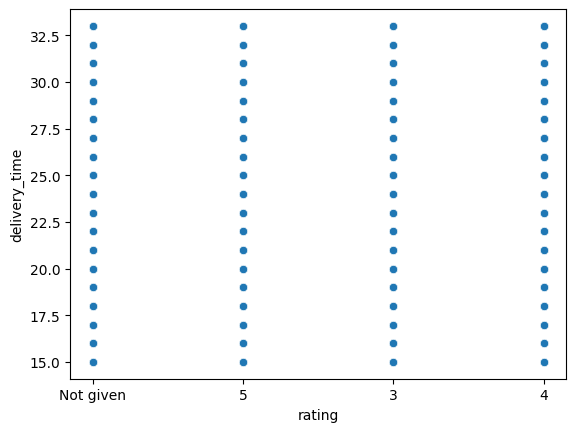

In [ ]:
sns.scatterplot(data=file, x='rating', y='delivery_time')


<Axes: xlabel='rating', ylabel='cost_of_the_order'>

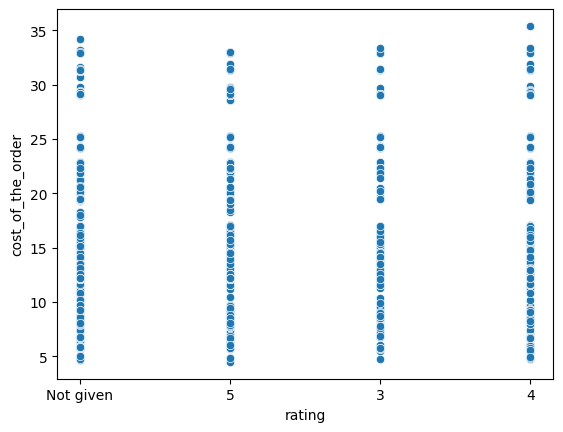

In [ ]:
sns.scatterplot(data=file, x='rating', y='cost_of_the_order')


<Axes: xlabel='rating', ylabel='count'>

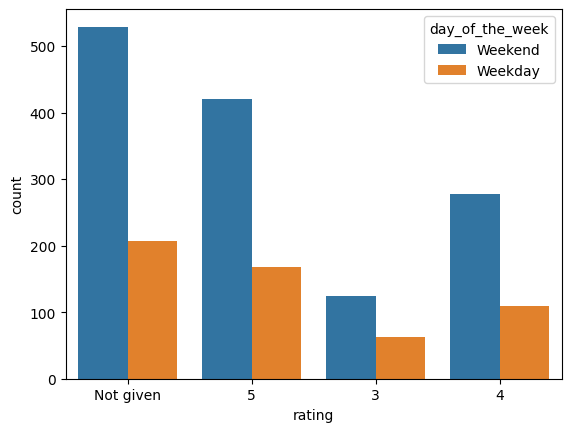

In [ ]:
    sns.countplot(x='rating', hue='day_of_the_week', data=file)


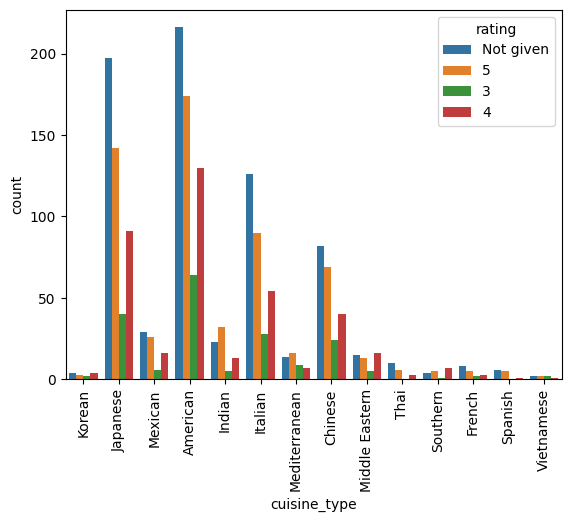

In [ ]:
plot=sns.countplot(x='cuisine_type', hue='rating', data=file)
plot.tick_params(axis='x', rotation=90)


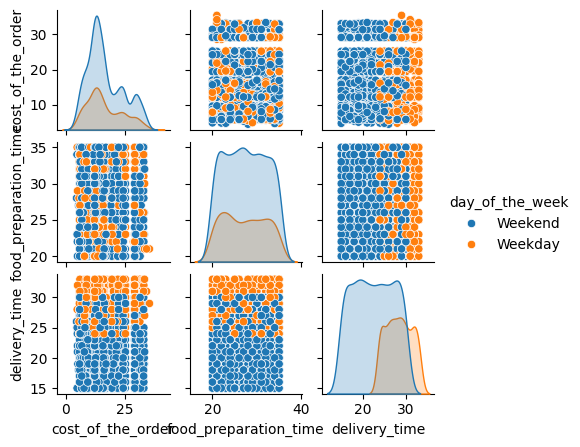

In [ ]:

subfile=file[['cost_of_the_order','food_preparation_time', 'delivery_time','day_of_the_week']]
sns.pairplot(data=subfile, hue='day_of_the_week', height=1.5)

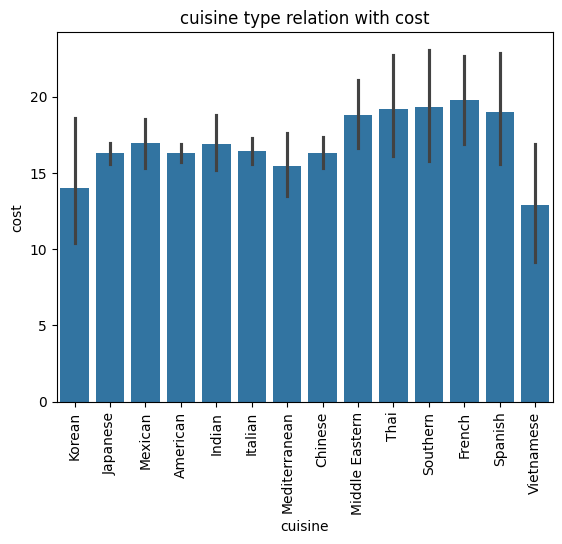

In [ ]:
plot=sns.barplot(x='cuisine_type', y='cost_of_the_order', data=file)
plot.tick_params(axis='x', rotation=90)
plt.title('cuisine type relation with cost')
plt.xlabel('cuisine')
plt.ylabel('cost')
plt.show()

- It takes less amount of time for delivery on weekends as compared to weekdays
- Delivery time does not have any effect on rating

Q13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
rating_data=file[file["rating"]!="Not given"]
temp=file[file["rating"]!="Not given"].groupby("restaurant_name").count()[["rating"]]
restaurants_popular=list(temp[temp["rating"]>50].index)

In [ ]:

restaurants_popular

['Blue Ribbon Fried Chicken',
 'Blue Ribbon Sushi',
 'Shake Shack',
 'The Meatball Shop']

In [ ]:
rating_data['rating'] = rating_data['rating'].astype(int)

/tmp/ipython-input-1433938148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['rating'] = rating_data['rating'].astype(int)


In [ ]:
for res in restaurants_popular:
  # print(rating_data[rating_data["restaurant_name"]==res])
  print(res,rating_data[rating_data["restaurant_name"]==res]["rating"].mean())

# rating_data[rating_data["restaurant_name"]=='Blue Ribbon Fried Chicken']["rating"].mean()

Blue Ribbon Fried Chicken 4.328125
Blue Ribbon Sushi 4.219178082191781
Shake Shack 4.2781954887218046
The Meatball Shop 4.511904761904762


Four restaurants fulfilling the criteria are "Blue Ribbon Fried Chicken", " Blue ribbon Sushi", "shake shack","the meatball shop"

Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
expensive=file[file["cost_of_the_order"]>20]["cost_of_the_order"].sum()*0.25
cheap=file[file["cost_of_the_order"]>5]["cost_of_the_order"].sum()*0.15
print(expensive+cheap)

8379.539499999999


The revenue is 8379.5 collars

Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
file["total_time"]=file["food_preparation_time"]+file["delivery_time"]

In [ ]:
len(file[file["total_time"]>60])/len(file)

0.1053740779768177

10.5 percent of orders take more than 60 minutes

Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?


<Axes: xlabel='delivery_time'>

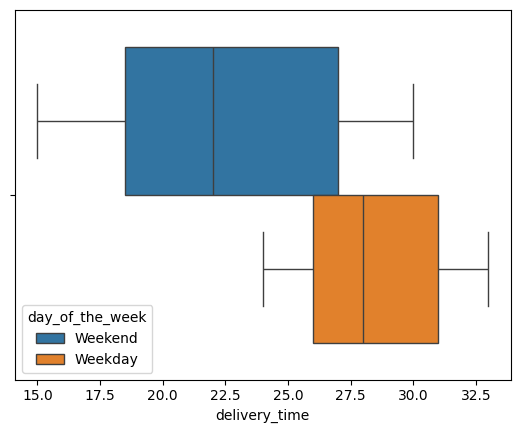

In [ ]:
sns.boxplot(x="delivery_time",hue="day_of_the_week",data=file)

In [ ]:
print(file[file["day_of_the_week"]=="Weekday"]["delivery_time"].mean())
print(file[file["day_of_the_week"]=="Weekend"]["delivery_time"].mean())

28.340036563071298
22.4700222057735


the trend is that it takes less time for delivery during weekends. there are very less distribution so the timing is standard
Mean delivery time for weekday is 28 minutes, it is 22.4 minutes for weekends

Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.

Conclusions:
- american cuisine is the most popular
- people are ordering more on weekends
- Most people do no give any ratings

Recommendations:
 - Total time (food preparation and delivery) can be reduced for a better experience
 - Weekday order footprint should be expanded
 - People should be encouraged to give ratings through coupons etc.
 - Expansion in popular cuisine like american might boost orders